In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import tensorflow as tf
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import sys
sys.path.append('..')
from dataset import batcher

In [22]:
MODEL_DIR = '../saved_models/'
LR_RATE = 0.001
OPT = tf.keras.optimizers.Adam(learning_rate=LR_RATE)
LOSS = 'MeanSquaredError'
METRICS = ['RootMeanSquaredError']

In [23]:
# Get test split
# bands = ['BLUE', 'GREEN', 'RED', 'NIR', 'SW_IR1', 'SW_IR2', 'TEMP', 'VIIRS', 'DELTA_TEMP', 'CO']
bands = ['VIIRS']
test_batcher = batcher.Batcher(bands, country_year="ethiopia-2018", bucket=False, shuffle=False, split='test', repeat=1, batch_size=3000).get_dataset()
x_true = []
y_true = []
for x, y in test_batcher:
    x_true.append(x)
    y_true.append(y)

print(np.shape(x_true))

(1, 652, 224, 224, 1)


In [81]:
# Load model
experiments = ['imagery_sample_cnn_regression_NL_512']

def load_model_from_dir(model_name):
    model_path = MODEL_DIR + model_name + '.h5'
    model = tf.keras.models.load_model(model_path, compile=False)
    
    return model

In [82]:
# Get consumption predictions
trained_model = load_model_from_dir(experiments[0])
trained_model.compile(
            loss=LOSS,
            optimizer=OPT,
            metrics=METRICS,
        )

y_preds = trained_model.predict_on_batch(x_true)
print(y_preds)

2023-02-22 13:31:23.421169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[[-2.11148083e-01]
 [ 1.62602931e-01]
 [-3.54019791e-01]
 [-1.04210228e-01]
 [-1.40821278e-01]
 [-2.38560885e-01]
 [-1.53232247e-01]
 [-1.78325862e-01]
 [-7.37504661e-02]
 [ 3.24032456e-02]
 [ 3.14180225e-01]
 [-1.94480449e-01]
 [-1.70586869e-01]
 [-2.09696144e-01]
 [ 2.31086895e-01]
 [-1.50906697e-01]
 [-1.56105280e-01]
 [-2.79739588e-01]
 [-2.11987823e-01]
 [-2.00935155e-01]
 [-2.15495124e-01]
 [ 1.62602931e-01]
 [-1.02078259e-01]
 [-1.41944334e-01]
 [ 2.12887162e-03]
 [-2.22397536e-01]
 [-6.67643687e-03]
 [-1.34692058e-01]
 [-2.26342067e-01]
 [-2.19529629e-01]
 [-2.14090645e-01]
 [-2.58299857e-01]
 [-1.23864021e-02]
 [ 7.40111768e-02]
 [-1.24781400e-01]
 [-5.45661747e-02]
 [-2.65515834e-01]
 [-1.65080473e-01]
 [-1.46715671e-01]
 [ 6.75009638e-02]
 [-1.59631938e-01]
 [-2.81171352e-01]
 [ 1.14047207e-01]
 [ 5.26389405e-02]
 [-8.37134793e-02]
 [ 9.49419141e-02]
 [-2.04114720e-01]
 [ 9.49419141e-02]
 [-4.22805816e-01]
 [-1.34508327e-01]
 [-9.53529850e-02]
 [-1.65574670e-01]
 [-1.9691133

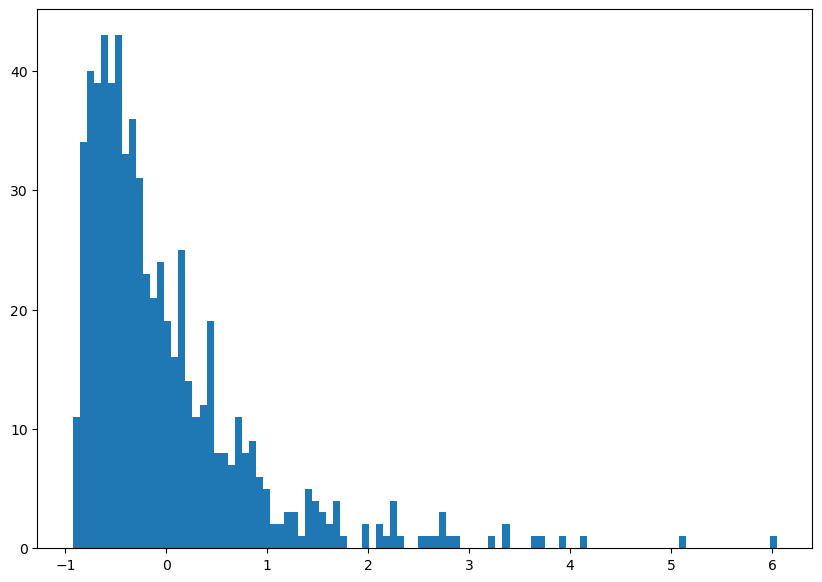

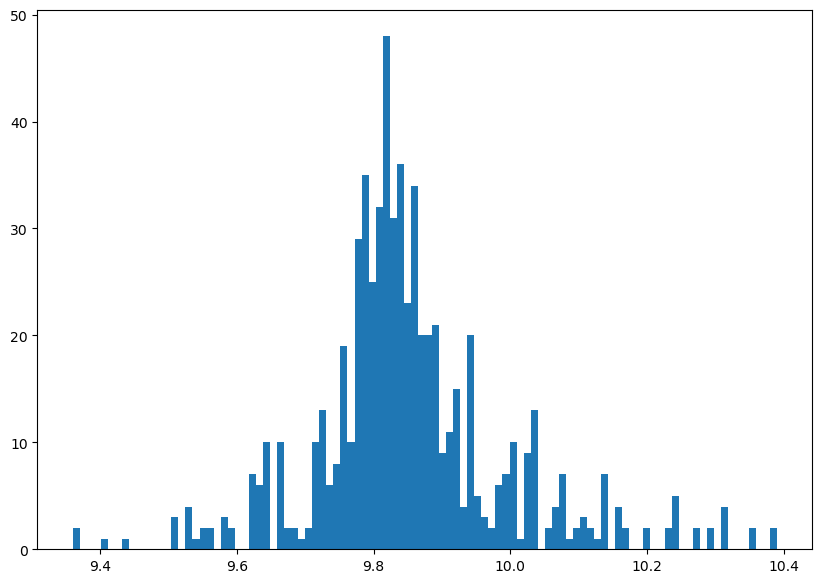

In [83]:
# Find r-squared
y_true = np.squeeze(y_true)
y_preds = np.squeeze(y_preds)
y_preds = y_preds + 10

# Plot histograms
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y_true, bins = 100)
plt.show()

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y_preds, bins = 100)
plt.show()



r2 = pearsonr(y_true, y_preds)[0]

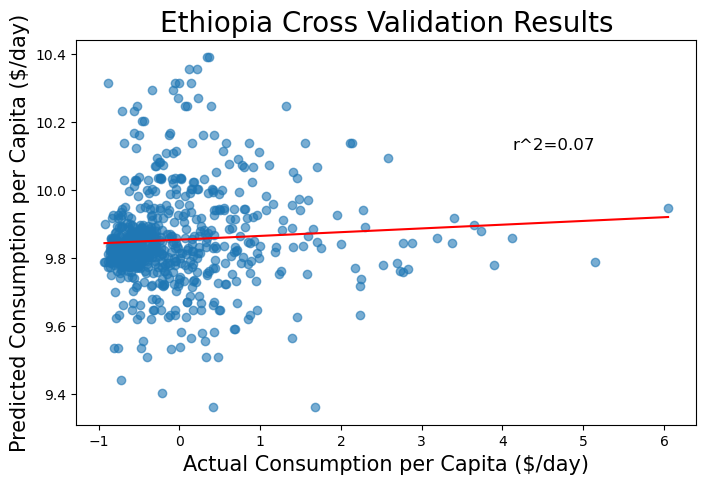

In [84]:
# Plot predictions
country = 'Ethiopia'
fig = plt.figure(figsize=(8,5))
plt.scatter(y_true, y_preds, alpha=0.6)
plt.plot(np.unique(y_true), np.poly1d(np.polyfit(y_true, y_preds, 1))(np.unique(y_true)), color='red')
plt.text(0.5, 0.5, f'r^2={round(r2, 2)}', ha='left', va='top', size=12, transform=ax.transAxes)
plt.xlabel('Actual Consumption per Capita ($/day)', fontsize=15)
plt.ylabel('Predicted Consumption per Capita ($/day)', fontsize=15)
plt.title(f'{country} Cross Validation Results', fontsize=20)
# plt.xlim([np.min(y_true), 10])
# plt.ylim([-2, np.max(y_preds)])
plt.show()